# RNN

In [2]:
#Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence 
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DeepLearning_Workshop/spam.csv',delimiter=',',encoding='latin-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
np.shape(df)

(5572, 5)

In [5]:
# Removing non useful columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

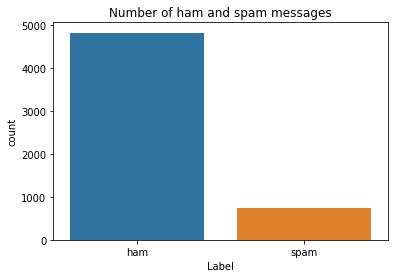

In [8]:
#Plotting Bar chart
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags

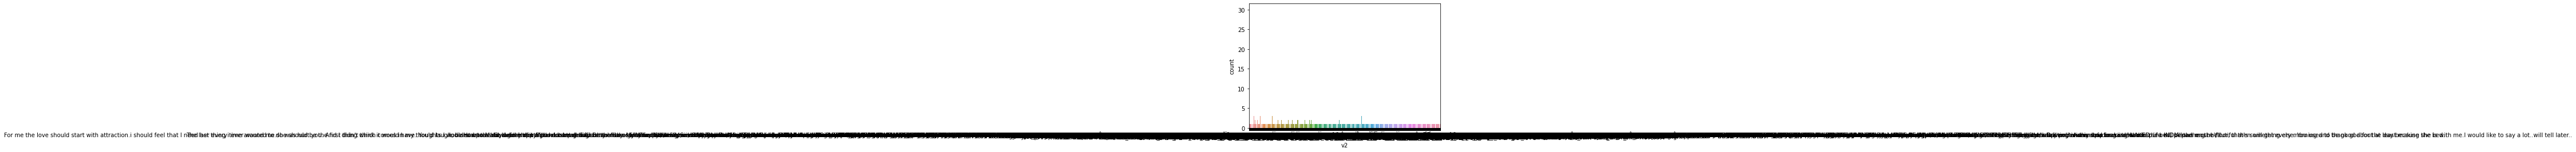

In [38]:
#Plotting Bar chart
sns.countplot(df.v2)

In [9]:
# Mapping spam as 1 amd ham as 0
df['v1'] = df['v1'].map({'spam':1,'ham':0})

In [29]:
df.head(20)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [11]:
# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

#split data into train and test
from sklearn.model_selection import train_test_split

In [12]:
X = df['v2'].values
y = df['v1'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
# Tokenization
t = Tokenizer()
t.fit_on_texts(X_train)
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [14]:
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length,padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length,padding='post')
print(padded_train)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


In [15]:
# Model is compiled and summary generated
vocab_size = len(t.word_index)+1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(SimpleRNN(24, return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

#compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=10)

#fit the model
model.fit(x=padded_train,
          y=y_train,
          epochs=50,
          validation_data=(padded_test,y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/50
140/140 [==============================] - 3s 7ms/step - loss: 0.2053 - accuracy: 0.9293 - val_loss: 0.1028 - val_accuracy: 0.9704
Epoch 2/50
140/140 [==============================] - 1s 6ms/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0940 - val_accuracy: 0.9713
Epoch 3/50
140/140 [==============================] - 1s 5ms/step - loss: 0.0427 - accuracy: 0.9879 - val_loss: 0.0719 - val_accuracy: 0.9812
Epoch 4/50
140/140 [==============================] - 1s 5ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 0.0788 - val_accuracy: 0.9785
Epoch 5/50
140/140 [==============================] - 1s 5ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0663 - val_accuracy: 0.9821
Epoch 6/50
140/140 [==============================] - 1s 6ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0790 - val_accuracy: 0.9812
Epoch 7/50
140/140 [==============================] - 1s 5ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0975 - val_accuracy: 0.9776
Epoch 

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
  print("Classification Report")
  print(classification_report(y_true,y_pred))
  acc_sc = accuracy_score(y_true,y_pred)
  print("Accuracy : "+str(acc_sc))
  return acc_sc

def plot_confusion_matrix(y_true,y_pred):
  mtx = confusion_matrix(y_true,y_pred)
  sns.heatmap(mtx,annot=True,fmt='d',linewidth=0.5,cmap="Blues",cbar=False)
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

In [18]:
preds = (model.predict(padded_test)>0.5).astype('int32')

In [22]:
# Support is the actual number of occurences of a class in the specified dataset

In [20]:
c_report(y_test,preds)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.95      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy : 0.97847533632287


0.97847533632287

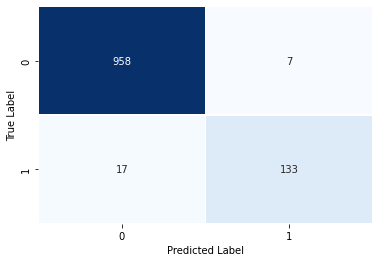

In [21]:
plot_confusion_matrix(y_test,preds)

In [30]:
# predicting our own input sentence

from tensorflow.keras.preprocessing.text import Tokenizer

sms = ["hello saar! Our Product is cool but it please saar!!!"]
sms1= ["Yo customer!!! Buy our amazing cool Air conditioner and get 30% offer on our products and stufff!!!! Bruhhhhh hurry!!!!!"]
sms2=["URGENT! You have won a 1 week FREE membership at Bangalore Club!!!  Hurry and avail the deal!!"]
sms3=["	URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]
sms_proc = t.texts_to_sequences(sms3)
sms_proc = pad_sequences(sms_proc,maxlen=max_length,padding='post')
pred=(model.predict(sms_proc)>0.5).astype("int32").item()
print(pred)

1
